In [42]:
import secrets, base64
import qrcode
import time, hmac, struct, hashlib

In [33]:
bytes = secrets.token_bytes(20)
secret_str = base64.b32encode(bytes).decode().rstrip("=")
secret_str

'MKIIVYOPNKGOGJ4MXUE66MTG7N3OU7A2'

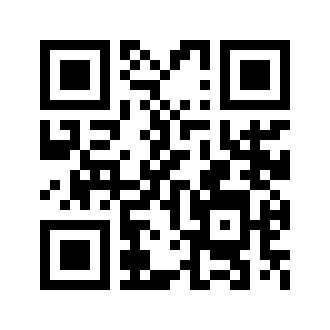

In [34]:
#onboarding url
img = qrcode.make(secret_str)
img.show()

1757509674


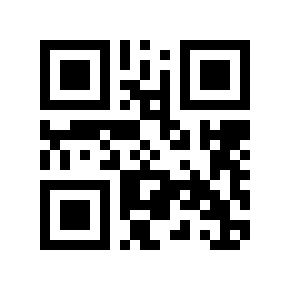

In [ ]:
def _fixpadding(base32):
    return base32 + '=' * ((8 - len(base32) % 8) % 8)

# Decode the base32-encoded secret back to bytes
decoded = base64.b32decode(_fixpadding(secret_str))
now = int(time.time())
counter = (now - 0) // 30
mac = hmac.new(decoded, struct.pack(">Q", counter), digestmod=hashlib.sha256).digest()
offset = mac[-1] & 0x0F
four = mac[offset:offset+4]
code_int = (struct.unpack(">I", four)[0] & 0x7FFFFFFF) % (10 ** 4)
str(code_int).zfill(4)
qrcode.make(str(code_int).zfill(4))